In [153]:
import matplotlib.pyplot as ply
import numpy as np
import pandas as pd

In [46]:
data = pd.read_table(
    'temp0.5.press0.1.rdf',skiprows=[0,1,2,3,4],
    delimiter=' ',names=['Row','c_1[1]','c_1[2]','c_1[3]'],index_col='Row')

In [47]:
data.head()

,c_1[1],c_1[2],c_1[3]
Row,,,
2,0.0375,0.0,0.0
3,0.0625,0.0,0.0
4,0.0875,0.0,0.0
5,0.1125,0.0,0.0
6,0.1375,0.0,0.0


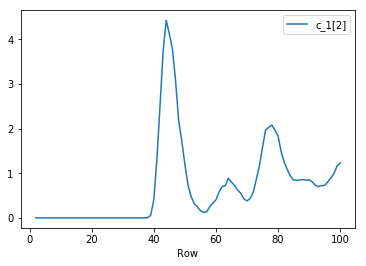

In [54]:
data.plot(y='c_1[2]')

In [58]:
data = pd.read_table('log.temp0.5.press0.1.file')

In [86]:
#застревает 
def read_line_special(path):
    with open(path,'r') as file:
        while file.readable():
            yield file.readline()

In [132]:
def read_line_special(file_object):
    while True:
        data = file_object.readline()
        if not data:
            break
        yield data

In [87]:
import re

In [151]:
def parser(line):
    result = re.fullmatch('[\s|\d|\.|\-]+',line)
    if result:
        res = re.search('\d',result.string) # костыль
        if res:
            return result.string
        else:
            return None
    else:
        return None

In [217]:
path = 'log.temp0.5.press0.1.file'
auxiliary_file = 'help.txt'
help_file = open(auxiliary_file,'w') # костыль - не могу сразу передавать в DataFrame str. Использовать split и int?
help_file.write('0 0 0 0 0 0 0 0 0\n') # костыль
with open(path,'r') as file:
    for line in read_line_special(file):
        #print(line)
        line = parser(line)
        if line:
            line = re.sub('\s+',' ',line) # ? костыль
            line = line[1:-2] + '\n' # костыль
            help_file.write(line)
help_file.close()

In [221]:
data = pd.read_table('help.txt',header=None,delimiter=' ',error_bad_lines=False)[1:]

In [224]:
data

,0,1,2,3,4,5,6,7,8
1,0,-4939.3676,493.33427,-4446.0333,0.494571,-0.170791,0.974530,NaN,NaN
2,100,-4977.7619,506.66209,-4471.0998,0.507932,0.697990,0.992883,NaN,NaN
3,200,-4948.6875,492.15704,-4456.5305,0.493391,-0.389637,0.972283,NaN,NaN
4,300,-4966.5002,510.18424,-4456.3159,0.511463,0.338601,0.985960,NaN,NaN
5,400,-4950.2296,531.52555,-4418.7040,0.532858,0.153105,0.981036,NaN,NaN
6,500,-4971.7275,518.26166,-4453.4658,0.519561,-0.120774,0.980144,NaN,NaN
7,600,-4971.4191,499.12739,-4472.2917,0.500378,0.503460,0.990263,NaN,NaN
8,700,-4936.9998,487.75478,-4449.2450,0.488977,-0.548941,0.966790,NaN,NaN
9,800,-4950.9432,474.97116,-4475.9720,0.476162,0.490899,0.987258,NaN,NaN
10,900,-4962.6769,493.41032,-4469.2666,0.494647,-0.317675,0.975176,NaN,NaN
